# 📌 1. Extracción de datos


### 🔹 **Fuente de datos**

*Los datos contienen información demográfica, contractual, de servicios y cargos asociados a clientes de telecomunicaciones.*  

*En este proyecto los datos se obtienen desde una API en formato JSON.
Según el entorno de ejecución, el path puede variar:*

In [ ]:
import pandas as pd

In [ ]:
# Opción Google Colab
datos = pd.read_json('/content/TelecomX_Data.json')

# Opción ejecución local
# datos = pd.read_json('../data/raw/TelecomX_Data.json')

datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 2. Limpieza y Transformación de datos


### 🔹 **Inspección inicial de la estructura**


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
datos['customer'].iloc[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [ ]:
datos['phone'].iloc[0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [ ]:
datos['internet'].iloc[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [ ]:
datos['account'].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

### 🔹 **Detección de valores faltantes y valores inconsistentes**



*Se inspeccionaron valores vacíos, strings inconsistentes y valores nulos explícitos antes de la limpieza.*

In [ ]:
for col in datos.columns:
    col_str = datos[col].astype(str)
    uniq = pd.unique(col_str)
    problematicos = [u for u in uniq if u.strip() == '' or u in ['None', 'nan']]

    if problematicos:
        print(f"\nColumna: {col}")
        print("Valores problemáticos:", problematicos)
        print("Todos los valores únicos:", uniq)


Columna: Churn
Valores problemáticos: ['']
Todos los valores únicos: ['No' 'Yes' '']


In [ ]:
datos.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
datos = datos.dropna(subset=['Churn'])
datos['Churn'].isna().sum()

np.int64(0)

In [ ]:
datos.shape[0]

7267

### 🔹 **Expansión de estructuras anidadas (JSON → columnas)**


In [ ]:
datos = pd.concat(
    [datos.drop(columns=['customer', 'phone', 'internet', 'account']),
     datos['customer'].apply(pd.Series),
     datos['phone'].apply(pd.Series),
     datos['internet'].apply(pd.Series),
     datos['account'].apply(pd.Series)],
    axis=1
)
datos.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


### 🔹 **Conversión y tratamiento de variables numéricas**


In [ ]:
charges_df = datos['Charges'].apply(pd.Series)
datos = pd.concat([datos.drop(columns=['Charges']), charges_df], axis=1)
datos['Total'] = pd.to_numeric(datos['Total'], errors='coerce')

datos.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
datos.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
media_total = datos['Total'].mean()
datos['Total'] = datos['Total'].fillna(media_total)

datos['Total'].isna().sum()


np.int64(0)

In [ ]:
datos['Cuentas_Diarias'] = datos['Monthly'] / 30
datos[['Monthly', 'Cuentas_Diarias']].head()


,Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### 🔹 **Normalización de variables categóricas**


In [ ]:
cols_a_limpiar = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in cols_a_limpiar:
    if col in datos.columns:
        datos[col] = datos[col].str.lower().str.strip()


In [ ]:
for col in cols_a_limpiar:
    if col in datos.columns:
        print(f"{col}: {datos[col].unique()}\n")

gender: ['female' 'male']

Partner: ['yes' 'no']

Dependents: ['yes' 'no']

PhoneService: ['yes' 'no']

MultipleLines: ['no' 'yes' 'no phone service']

InternetService: ['dsl' 'fiber optic' 'no']

OnlineSecurity: ['no' 'yes' 'no internet service']

OnlineBackup: ['yes' 'no' 'no internet service']

DeviceProtection: ['no' 'yes' 'no internet service']

TechSupport: ['yes' 'no' 'no internet service']

StreamingTV: ['yes' 'no' 'no internet service']

StreamingMovies: ['no' 'yes' 'no internet service']

Contract: ['one year' 'month-to-month' 'two year']

PaperlessBilling: ['yes' 'no']

PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']

Churn: ['no' 'yes' '']



In [ ]:
datos = datos[datos['Churn'] != '']
datos['Churn'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
datos.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [ ]:
datos = datos.drop(datos[(datos['tenure'] == 0) & (datos['Total'] == 2280.63)].index)


In [ ]:
datos[(datos['tenure'] == 0) & (datos['Total'] == 2280.63)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


### 🔹 **Renombrado y estandarización de columnas**


In [ ]:
datos.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'Mayor_Edad',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Lineas_Multiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Metodo_Pago',
    'Monthly': 'Pago_Mensual',
    'Total': 'Pago_Total',
    'Cuentas_Diarias': 'Pago_Diario'
  }, inplace=True)

datos.head()

,ID_Cliente,Evasion,Genero,Mayor_Edad,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Digital,Metodo_Pago,Pago_Mensual,Pago_Total,Pago_Diario
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [ ]:
cols_a_redondear = ['Pago_Diario', 'Pago_Mensual', 'Pago_Total']
datos[cols_a_redondear] = datos[cols_a_redondear].round(2)

datos[cols_a_redondear].head()


,Pago_Diario,Pago_Mensual,Pago_Total
0,2.19,65.6,593.30
1,2.00,59.9,542.40
2,2.46,73.9,280.85
3,3.27,98.0,1237.85
4,2.80,83.9,267.40


### 🔹 **Traducción y mapeo de valores categóricos**


In [ ]:
contrato_map = {
    'month-to-month': 'Mes a mes',
    'one year': 'Un año',
    'two year': 'Dos años'
}

metodo_pago_map = {
    'bank transfer (automatic)': 'Transferencia bancaria (automática)',
    'credit card (automatic)': 'Tarjeta de crédito (automática)',
    'electronic check': 'Cheque electrónico',
    'mailed check': 'Cheque enviado'
}

internet_map = {
    'dsl': 'DSL',
    'fiber optic': 'Fibra óptica',
    'no': 'Sin servicio'
}

datos['Contrato'] = datos['Contrato'].map(contrato_map).fillna(datos['Contrato'])
datos['Metodo_Pago'] = datos['Metodo_Pago'].map(metodo_pago_map).fillna(datos['Metodo_Pago'])
datos['Servicio_Internet'] = datos['Servicio_Internet'].map(internet_map).fillna(datos['Servicio_Internet'])

genero_map = {
    'female': 'Femenino',
    'male': 'Masculino'
}

datos['Genero'] = datos['Genero'].map(genero_map).fillna(datos['Genero'])

cols_si_no = [
    'Evasion', 'Pareja', 'Dependientes', 'Servicio_Telefonico', 'Lineas_Multiples',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Digital'
]

for col in cols_si_no:
    datos[col] = datos[col].str.lower().map({'yes': 'Sí', 'no': 'No'}).fillna(datos[col])

datos.head()

,ID_Cliente,Evasion,Genero,Mayor_Edad,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Digital,Metodo_Pago,Pago_Mensual,Pago_Total,Pago_Diario
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque enviado,65.6,593.30,2.19
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mes a mes,No,Cheque enviado,59.9,542.40,2.00
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mes a mes,Sí,Cheque enviado,83.9,267.40,2.80


### 🔹 **Dataset final listo para el análisis**

In [ ]:
datos.index = range(1, len(datos) + 1)
datos.head()

,ID_Cliente,Evasion,Genero,Mayor_Edad,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Digital,Metodo_Pago,Pago_Mensual,Pago_Total,Pago_Diario
1,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque enviado,65.6,593.30,2.19
2,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mes a mes,No,Cheque enviado,59.9,542.40,2.00
3,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.46
4,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.27
5,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mes a mes,Sí,Cheque enviado,83.9,267.40,2.80


# 📊 3. Análisis Exploratorio de Datos (EDA)


### 🔹 **Estadísticas descriptivas – Variables numéricas**

In [ ]:
datos.describe().round(2)

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


### 🔹 **Estadísticas descriptivas – Variables categóricas**

In [ ]:
datos.describe(include='object')

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


### 🔹 **Distribución de evasión**

In [ ]:
import matplotlib.pyplot as plt

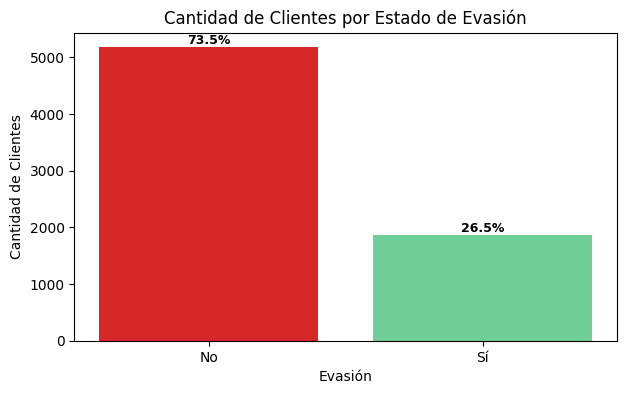

In [ ]:
counts = datos['Evasion'].value_counts()
porcentajes = (counts / counts.sum()) * 100

plt.figure(figsize=(7,4))
bars = plt.bar(
    counts.index,
    counts.values,
    color=['#D62828', '#6FCF97']
)

for bar, pct in zip(bars, porcentajes):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{pct:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title("Cantidad de Clientes por Estado de Evasión")
plt.xlabel("Evasión")
plt.ylabel("Cantidad de Clientes")
plt.show()

### 🔹 **Evasión por género**

In [ ]:
import numpy as np

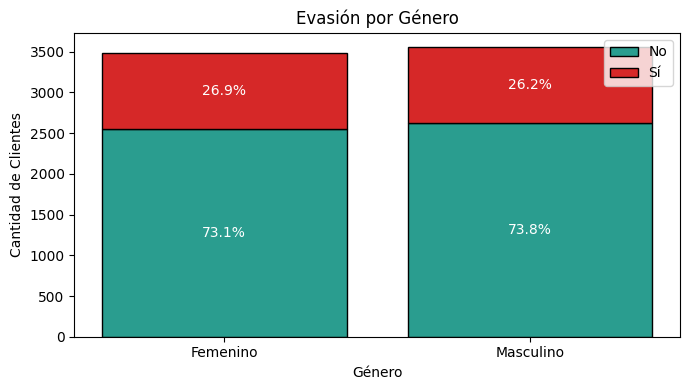

In [ ]:
tabla = datos.groupby(["Genero", "Evasion"]).size().unstack()
colors = ["#2A9D8F", "#D62828"]

plt.figure(figsize=(7,4))
barra = plt.bar(
    tabla.index,
    tabla["No"],
    label="No",
    color=colors[0],
    edgecolor="black"
)
barra2 = plt.bar(
    tabla.index,
    tabla["Sí"],
    bottom=tabla["No"],
    label="Sí",
    color=colors[1],
    edgecolor="black"
)

plt.title("Evasión por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Clientes")
plt.legend()

total_por_genero = tabla.sum(axis=1)

for i, genero in enumerate(tabla.index):
    pct_no = tabla.loc[genero, "No"] / total_por_genero[genero] * 100
    plt.text(i, tabla.loc[genero, "No"]/2, f"{pct_no:.1f}%",
             ha="center", va="center", color="white", fontsize=10)

    pct_si = tabla.loc[genero, "Sí"] / total_por_genero[genero] * 100
    plt.text(i, tabla.loc[genero, "No"] + tabla.loc[genero, "Sí"]/2,
             f"{pct_si:.1f}%", ha="center", va="center", color="white", fontsize=10)

plt.tight_layout()
plt.show()


### 🔹 **Evasión por tipo de contrato**

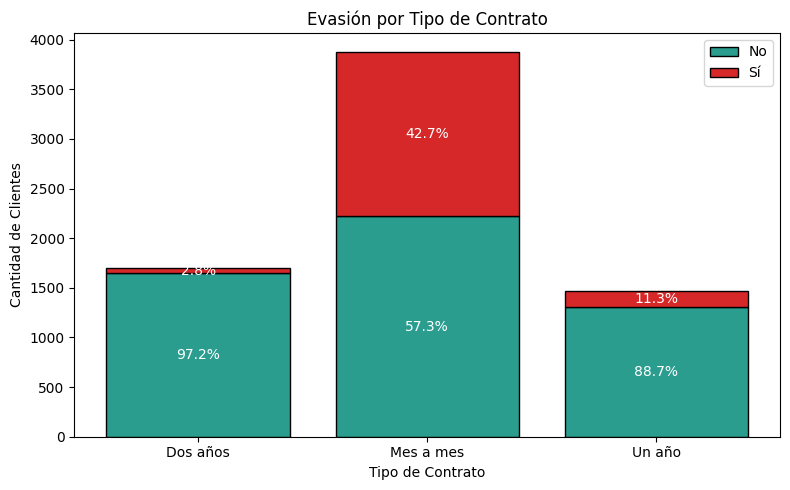

In [ ]:
tabla = datos.groupby(["Contrato", "Evasion"]).size().unstack()
colors = ["#2A9D8F", "#D62828"]
plt.figure(figsize=(8,5))

plt.bar(
    tabla.index,
    tabla["No"],
    label="No",
    color=colors[0],
    edgecolor="black"
)

plt.bar(
    tabla.index,
    tabla["Sí"],
    bottom=tabla["No"],
    label="Sí",
    color=colors[1],
    edgecolor="black"
)

plt.title("Evasión por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=0)
plt.legend()

total_por_contrato = tabla.sum(axis=1)

for i, contrato in enumerate(tabla.index):
    pct_no = tabla.loc[contrato, "No"] / total_por_contrato[contrato] * 100
    plt.text(
        i,
        tabla.loc[contrato, "No"]/2,
        f"{pct_no:.1f}%",
        ha="center", va="center",
        color="white", fontsize=10
    )

    pct_si = tabla.loc[contrato, "Sí"] / total_por_contrato[contrato] * 100
    plt.text(
        i,
        tabla.loc[contrato, "No"] + tabla.loc[contrato, "Sí"]/2,
        f"{pct_si:.1f}%",
        ha="center", va="center",
        color="white", fontsize=10
    )

plt.tight_layout()
plt.show()

### 🔹 **Evasión por método de pago**

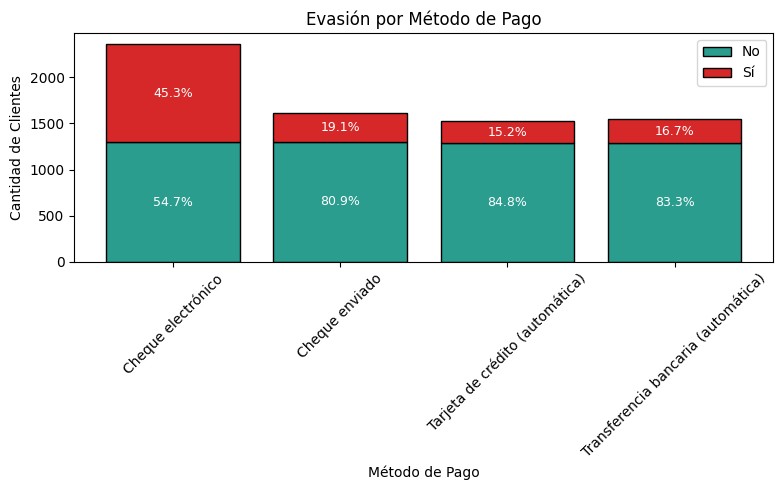

In [ ]:
tabla_pago = datos.groupby(["Metodo_Pago", "Evasion"]).size().unstack().fillna(0)
colors = ["#2A9D8F", "#D62828"]

plt.figure(figsize=(8,5))

plt.bar(
    tabla_pago.index,
    tabla_pago["No"],
    label="No",
    color=colors[0],
    edgecolor="black"
)

plt.bar(
    tabla_pago.index,
    tabla_pago["Sí"],
    bottom=tabla_pago["No"],
    label="Sí",
    color=colors[1],
    edgecolor="black"
)

plt.title("Evasión por Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.legend()

totales = tabla_pago.sum(axis=1)

for i, metodo in enumerate(tabla_pago.index):
    pct_no = tabla_pago.loc[metodo, "No"] / totales[metodo] * 100
    plt.text(
        i,
        tabla_pago.loc[metodo, "No"] / 2,
        f"{pct_no:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )
    pct_si = tabla_pago.loc[metodo, "Sí"] / totales[metodo] * 100
    plt.text(
        i,
        tabla_pago.loc[metodo, "No"] + tabla_pago.loc[metodo, "Sí"] / 2,
        f"{pct_si:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )

plt.tight_layout()
plt.show()

### 🔹 **Evasión por servicio de internet**

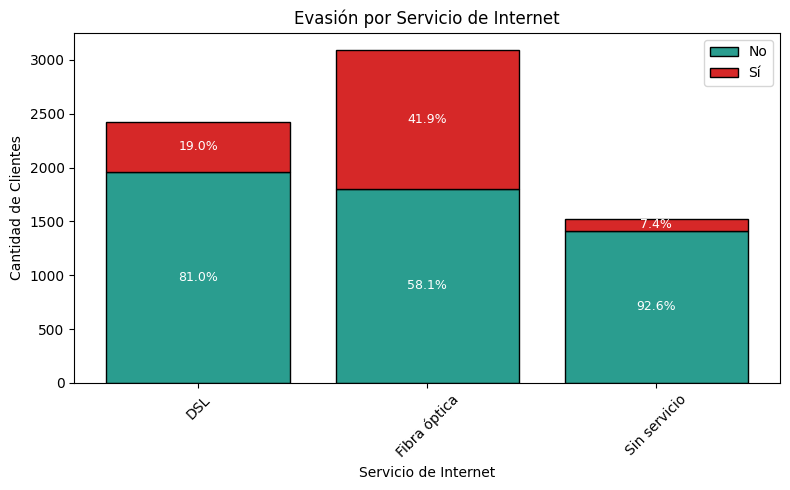

In [ ]:
tabla_internet = datos.groupby(["Servicio_Internet", "Evasion"]).size().unstack().fillna(0)
colors = ["#2A9D8F", "#D62828"]
plt.figure(figsize=(8,5))

plt.bar(
    tabla_internet.index,
    tabla_internet["No"],
    label="No",
    color=colors[0],
    edgecolor="black"
)

plt.bar(
    tabla_internet.index,
    tabla_internet["Sí"],
    bottom=tabla_internet["No"],
    label="Sí",
    color=colors[1],
    edgecolor="black"
)

plt.title("Evasión por Servicio de Internet")
plt.xlabel("Servicio de Internet")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.legend()

totales = tabla_internet.sum(axis=1)

for i, servicio in enumerate(tabla_internet.index):
    pct_no = tabla_internet.loc[servicio, "No"] / totales[servicio] * 100
    plt.text(
        i,
        tabla_internet.loc[servicio, "No"] / 2,
        f"{pct_no:.1f}%",
        ha="center", va="center",
        color="white", fontsize=9
    )

    pct_si = tabla_internet.loc[servicio, "Sí"] / totales[servicio] * 100
    plt.text(
        i,
        tabla_internet.loc[servicio, "No"] + tabla_internet.loc[servicio, "Sí"] / 2,
        f"{pct_si:.1f}%",
        ha="center", va="center",
        color="white", fontsize=9
    )

plt.tight_layout()
plt.show()

### 🔹 **Variables numéricas (densidades)**

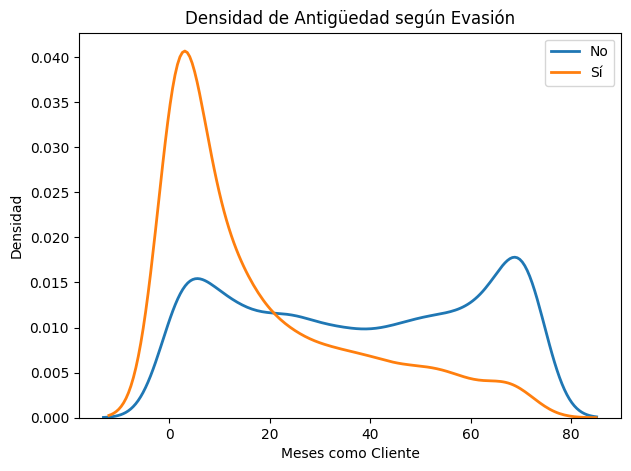

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))

sns.kdeplot(
    datos[datos["Evasion"] == "No"]["Antiguedad"],
    label="No",
    linewidth=2
)

sns.kdeplot(
    datos[datos["Evasion"] == "Sí"]["Antiguedad"],
    label="Sí",
    linewidth=2
)

plt.title("Densidad de Antigüedad según Evasión")
plt.xlabel("Meses como Cliente")
plt.ylabel("Densidad")
plt.legend()
plt.show()

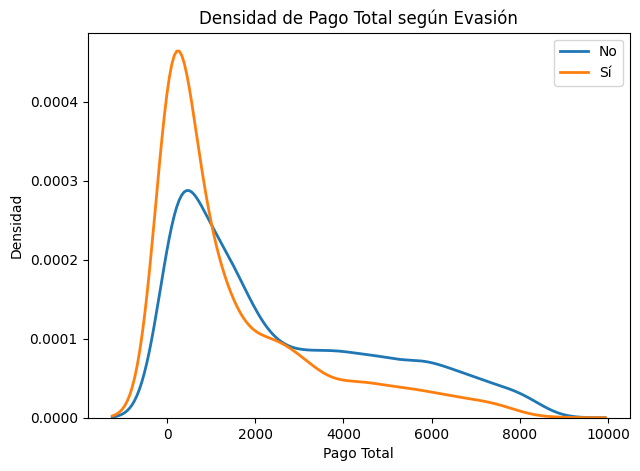

In [ ]:
plt.figure(figsize=(7,5))

sns.kdeplot(
    datos[datos["Evasion"] == "No"]["Pago_Total"],
    label="No",
    linewidth=2
)

sns.kdeplot(
    datos[datos["Evasion"] == "Sí"]["Pago_Total"],
    label="Sí",
    linewidth=2
)

plt.title("Densidad de Pago Total según Evasión")
plt.xlabel("Pago Total")
plt.ylabel("Densidad")
plt.legend()
plt.show()


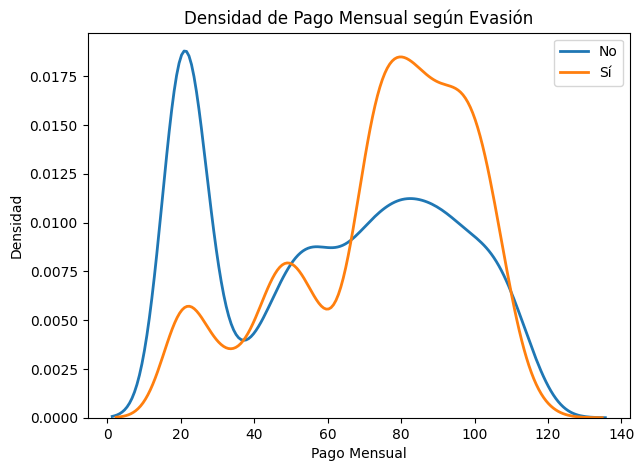

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

sns.kdeplot(
    datos[datos["Evasion"] == "No"]["Pago_Mensual"],
    label="No",
    linewidth=2
)

sns.kdeplot(
    datos[datos["Evasion"] == "Sí"]["Pago_Mensual"],
    label="Sí",
    linewidth=2
)

plt.title("Densidad de Pago Mensual según Evasión")
plt.xlabel("Pago Mensual")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# 🔗 4. Análisis de correlación


### 🔹 **Correlación entre variables numéricas**

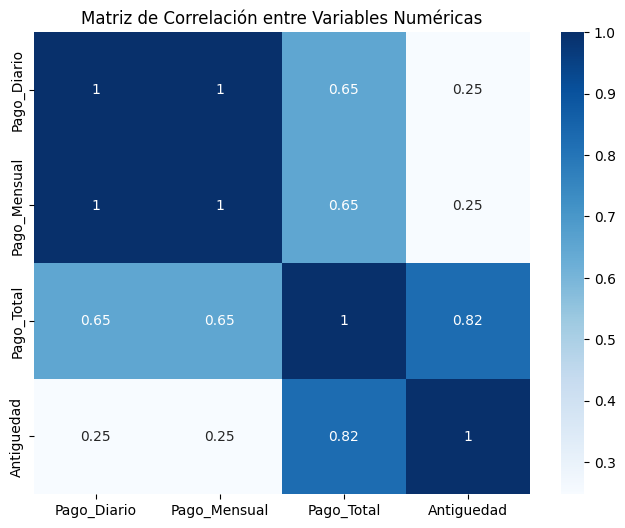

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    datos[["Pago_Diario","Pago_Mensual","Pago_Total","Antiguedad"]].corr(),
    annot=True,
    cmap="Blues"
)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


### 🔹 **Relación entre Pago Diario y Evasión**

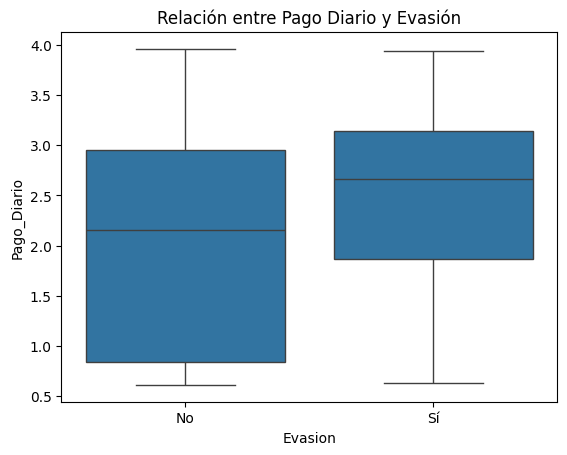

In [ ]:
sns.boxplot(data=datos, x="Evasion", y="Pago_Diario")
plt.title("Relación entre Pago Diario y Evasión")
plt.show()


### 🔹 **Correlación entre servicios y evasión**

*(Las variables de servicios fueron convertidas a formato binario: Sí = 1, No = 0, para facilitar el análisis de correlación.)*


In [ ]:
servicios = [
    "Servicio_Telefonico",
    "Lineas_Multiples",
    "Servicio_Internet",
    "Seguridad_Online",
    "Respaldo_Online",
    "Proteccion_Dispositivo",
    "Soporte_Tecnico",
    "Streaming_TV",
    "Streaming_Peliculas"
]

datos_serv = datos.copy()
for col in servicios:
    datos_serv[col] = datos_serv[col].map({"Sí": 1, "No": 0})

datos_serv["Cantidad_Servicios"] = datos_serv[servicios].sum(axis=1)

datos_serv["Cantidad_Servicios"].head()



,Cantidad_Servicios
1,4.0
2,3.0
3,2.0
4,5.0
5,3.0


In [ ]:
datos_serv["Evasion_num"] = datos_serv["Evasion"].map({"Sí": 1, "No": 0})
corr = datos_serv[["Evasion_num", "Cantidad_Servicios", "Pago_Total", "Pago_Mensual", "Pago_Diario", "Antiguedad"]].corr()

corr

,Evasion_num,Cantidad_Servicios,Pago_Total,Pago_Mensual,Pago_Diario,Antiguedad
Evasion_num,1.000000,-0.067264,-0.199427,0.193356,0.193412,-0.352229
Cantidad_Servicios,-0.067264,1.000000,0.796276,0.802322,0.802300,0.523600
Pago_Total,-0.199427,0.796276,1.000000,0.650469,0.650487,0.824760
Pago_Mensual,0.193356,0.802322,0.650469,1.000000,0.999996,0.247900
Pago_Diario,0.193412,0.802300,0.650487,0.999996,1.000000,0.247910
Antiguedad,-0.352229,0.523600,0.824760,0.247900,0.247910,1.000000


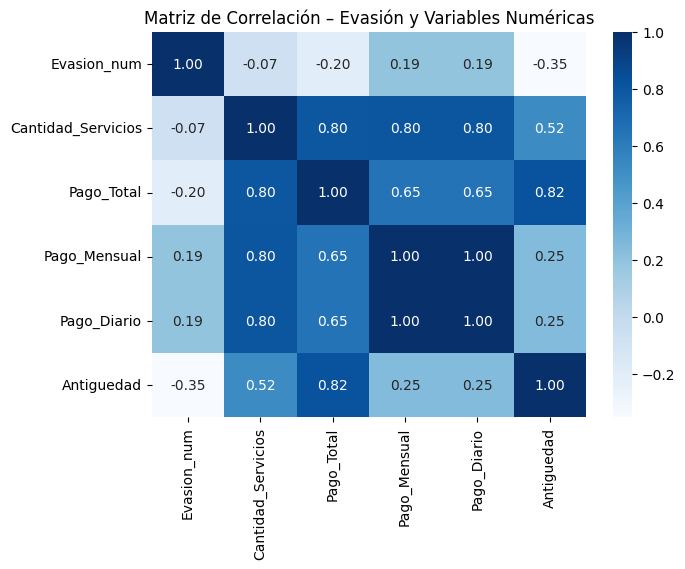

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación – Evasión y Variables Numéricas")
plt.show()

# 📄 5. Informe Final – Telecom X


### 🔹 **1. Introducción**


El presente análisis tiene como objetivo comprender los factores asociados a la evasión de clientes (Churn) dentro de la empresa.  
La evasión representa uno de los principales desafíos, ya que implica pérdida de ingresos, aumento de costos y disminución de la satisfacción del cliente.  

A través de la limpieza de datos, el análisis exploratorio y la comparación entre perfiles de clientes que se quedan y los que cancelan, se busca identificar patrones que permitan orientar acciones estratégicas para reducir el churn.

###🔹 **2. Limpieza y Tratamiento de Datos**

Los datos fueron obtenidos desde una API en formato JSON y posteriormente convertidos a un DataFrame de Pandas.  
<br>
Las principales tareas realizadas fueron:  

✔️ Importación y estructura

* Carga del JSON desde la API.

* Conversión del diccionario de datos a DataFrame.

* Revisión del tipo de cada columna.

✔️ Limpieza

* Estandarización de valores categóricos (por ejemplo: “Sí/No”, “DSL/Fibra/No”).

* Eliminación de filas incompletas cuando correspondía.

* Conversión de valores numéricos como:

  - *Pago_Mensual*

  - *Pago_Total*

  - *Antiguedad*

  - *Pago_Diario*

* Redondeo de valores con dos decimales.

* Ajuste del índice para comenzar en 1.

✔️ Preparación final

* Verificación de cantidades, tipos y valores únicos.

* Confirmación de consistencia en columnas clave como *Evasion, Metodo_Pago, Contrato, Genero, Servicio_Internet*.

###🔹 **3. Análisis Exploratorio de Datos (EDA)**

✔️ **3.1 Distribución general de Evasión**

Se analizó la proporción entre clientes que se quedaron y los que cancelaron.
El gráfico muestra una mayoría que permanece, pero una proporción significativa abandona.  
<br>
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/evasion.png?raw=true" width="600">  
<br>

✔️ **3.2 Evasión por variables categóricas**

Se realizó un recuento y visualización para detectar patrones según distintos perfiles:  

📌 **Género**

* Femenino: ~26,9% de evasión

* Masculino: ~26,2% de evasión  

➡️ *No muestra diferencias significativas.*  
<br>
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/genero_evasion.png?raw=true" width="600">  
<br>
📌 **Tipo de Contrato**

* Mes a mes: ~42,7%

* Un año: ~11,3%

* Dos años: ~2,8%  

➡️ *El contrato mes a mes es el mayor predictor de cancelación.*  
<br>
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/contrato_evasion.png?raw=true" width="600">  
<br>
📌 **Método de Pago**

* Cheque electrónico: ~45,3%

* Transferencia bancaria / Tarjeta automática: ~15–17%

* Cheque enviado: ~19%  

➡️ *Los clientes que pagan con cheque electrónico tienen un churn muy alto.*  
<br>
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/metodopago_evasion.png?raw=true" width="600">  
<br>
📌 **Servicio de Internet**

* DSL: ~19%

* Fibra óptica: ~41,9%

* Sin servicio: ~7,4%  

➡️ *Los clientes con fibra óptica presentan la mayor evasión.*  
<br>
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/serviciointernet_evasion.png?raw=true" width="600">  
<br>
✔️ **3.3 Variables numéricas**

Se analizaron distribuciones con curvas de densidad:  

**Antigüedad (meses):**

* Los clientes que se van tienden a tener **menos tiempo en la empresa.**

* La densidad muestra un pico claro en los primeros meses de servicio.
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/antiguedad_evasion.png?raw=true" width="600">  
<br>
<br>

**Pago Total:**

* Los clientes que se dan de baja tienen **menor gasto acumulado, indicando abandono temprano.**
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/pagototal_evasion.png?raw=true" width="600">  
<br>
<br>

**Pago Mensual / Diario:**

* No muestran diferencias extremas, pero los clientes con pagos más altos presentan tendencia levemente mayor a irse, lo que sugiere una posible sensibilidad al costo.  
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/pago_mensual.png?raw=true" width="600">  
<br>
<br>

✔️ **3.4 Correlación entre variables numéricas**

Para entender cómo se relacionan las variables numéricas entre sí y cómo influyen en la evasión, se analizaron distintas matrices de correlación.   
<br>
📌 **Correlación entre variables numéricas**

La matriz muestra relaciones débiles en general, lo que indica que no hay dependencias fuertes entre las variables numéricas del dataset.  
Aun así, se observan pequeñas asociaciones que ayudan a orientar el análisis.  

<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/correlacion_numericas.png?raw=true" width="600">  
<br>
<br>

📌 **Correlación entre la evasión y las variables de servicios**

Cuando se incorpora la variable *Evasión*, aparece una relación más clara con algunos servicios específicos.  
Esto sugiere que **ciertos servicios contratados pueden influir en la probabilidad de que un cliente se vaya.**
<br>
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/correlacion_servicios.png?raw=true" width="600">  
<br>
📌 **Relación entre el pago diario y la evasión**

Se observa que los clientes que pagan más por día tienden a mostrar **mayores niveles de evasión**, lo que puede indicar sensibilidad al costo.
<br>
<img src="https://github.com/belubullorini/telecom-x-churn/blob/main/images/relacion_diario_evasion.png?raw=true" width="600">  
<br>

###🔹 **4. Conclusiones e Insights**

🔍 **Principales descubrimientos:**

**1. El tipo de contrato es el factor más fuerte asociado a la evasión.**

* Churn altísimo en contratos mes a mes.

* Churn muy bajo en contratos de 1 y 2 años.

**2. El método de pago también influye mucho.**

* El cheque electrónico es usado por los clientes con mayor tasa de evasión.

* Los pagos automáticos tienen tasas más bajas.

**3. La fibra óptica tiene más evasión que DSL.**  

Esto puede indicar:

* Problemas de servicio,

* Expectativas más altas de los clientes,

* Competencia más fuerte en ese segmento.

**4. Los clientes que se van suelen llevar poco tiempo.**  

Esto refuerza la necesidad de fortalecer la experiencia inicial.

**5. Las diferencias por género no son relevantes.**

**6. Las variables numéricas no muestran correlaciones fuertes entre sí.**  
La matriz de correlación indica que no hay relaciones lineales importantes entre las variables numéricas, por lo que la evasión depende más de decisiones comerciales y de experiencia del cliente que de variables económicas puras.

**7. El pago diario muestra relación con la evasión.**  
Los clientes con un costo diario más alto tienden a evadirse más, lo que sugiere sensibilidad al precio.

###🔹 **5. Recomendaciones Estratégicas**

**1. Incentivar contratos más largos**

* Descuentos por permanencia,

* Bonos de velocidad,

* Mes gratis al pasar a un contrato anual.

**2. Promover métodos de pago automáticos**

* Beneficios exclusivos si el cliente pasa de cheque electrónico a débito/transferencia.

**3. Revisar el servicio de fibra óptica**

* Control de calidad,

* Revisión de reclamos,

* Evaluar si existen zonas con más desconexiones.

**4. Programa de retención en los primeros 3 meses**

* Llamadas de acompañamiento,

* Monitoreo de satisfacción,

* Resolución rápida de problemas técnicos.

**5. Segmentar campañas según riesgo**

* Contrato mes a mes + fibra óptica + cheque electrónico = *cliente de alto riesgo.*

**6. Revisar precios y planes con pagos diarios/mensuales elevados**  

* Los clientes con cargos diarios/mensuales más altos muestran mayor probabilidad de evasión.  

* Evaluar ofrecer planes más accesibles, descuentos por fidelidad o ajustar precios en segmentos sensibles.